In [1]:
import jax.numpy as jnp
import numpy as np

# from utils_v2 import lucas_kanade
from scipy.signal import convolve2d
from jax.image import resize
import cv2
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import h5py
import matplotlib.pyplot as plt


# Function to safely load datasets from HDF5 .mat files
def load_hdf5_mat(file_path, key):
    with h5py.File(file_path, "r") as f:
        dataset = f[key][()]  # Convert to NumPy array
        return np.array(dataset)  # Ensure correct format


# Load the image data
img_sans = np.abs(load_hdf5_mat("sansdeformation.mat", "img"))
img_avec = np.abs(load_hdf5_mat("avecdeformation.mat", "img"))

# Display first image
plt.figure()
plt.imshow(img_sans, cmap="hot", vmin=0.01 * 10**4, vmax=0.3 * 10**4)
plt.colorbar()
plt.title("epsilon")
plt.show()

# Generate meshgrid for filtering
N1, N2 = img_sans.shape
x = np.linspace(-1, 1, N2)
y = np.linspace(-1, 1, N1)
X, Y = np.meshgrid(x, y)

filtre = (1 - np.tanh((np.sqrt((X - 0.3) ** 2 + Y**2) - 10) * N2 / 10)) / 2

# Apply filter and display second image
img_filtered = np.clip(img_sans * filtre, 0.01 * 10**4, 0.3 * 10**4)
plt.figure()
plt.imshow(img_filtered, cmap="hot")
plt.colorbar()
plt.title("Filtered Image")
plt.show()

UFuncTypeError: ufunc 'absolute' did not contain a loop with signature matching types <class 'numpy.dtypes.VoidDType'> -> None

In [ ]:
with h5py.File("sansdeformation.mat", "r") as f:
    img_data = f["img"][:]
    print(type(img_data))  # Check type
    print(img_data.shape)  # Check shape
    print(img_data.dtype)  # Check data type

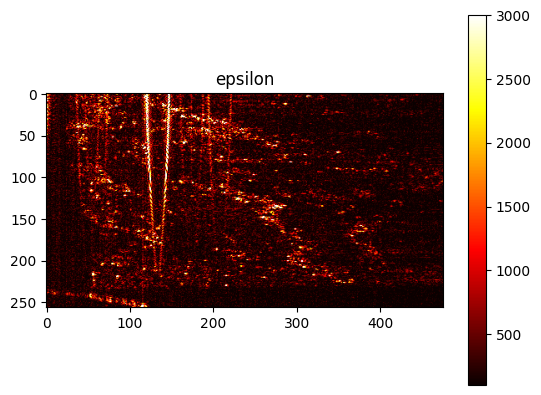

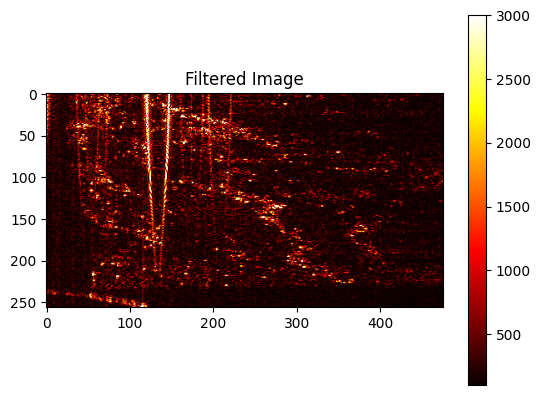

In [25]:
import h5py
import numpy as np
import h5py
import matplotlib.pyplot as plt

with h5py.File("sansdeformation.mat", "r") as f:
    img_sans = f["img"][:]  # Extract raw data

# If img_sans is a structured array, we need to index properly
if isinstance(img_sans, np.ndarray) and img_sans.dtype.names:
    img_sans = img_sans[img_sans.dtype.names[0]]  # Extract first field

img_sans = np.array(img_sans)  # Convert to a NumPy array
img_sans = np.abs(img_sans)  # Apply absolute function safely

plt.figure()
plt.imshow(img_sans, cmap="hot", vmin=0.01 * 10**4, vmax=0.3 * 10**4)
plt.colorbar()
plt.title("epsilon")
plt.show()

# Generate meshgrid for filtering
N1, N2 = img_sans.shape
x = np.linspace(-1, 1, N2)
y = np.linspace(-1, 1, N1)
X, Y = np.meshgrid(x, y)

filtre = (1 - np.tanh((np.sqrt((X - 0.3) ** 2 + Y**2) - 10) * N2 / 10)) / 2

# Apply filter and display second image
img_filtered = np.clip(img_sans * filtre, 0.01 * 10**4, 0.3 * 10**4)
plt.figure()
plt.imshow(img_filtered, cmap="hot")
plt.colorbar()
plt.title("Filtered Image")
plt.show()

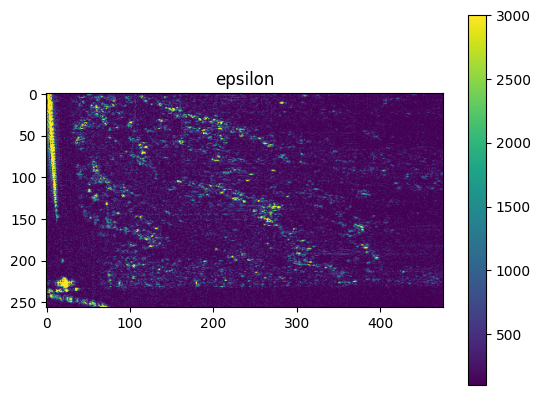

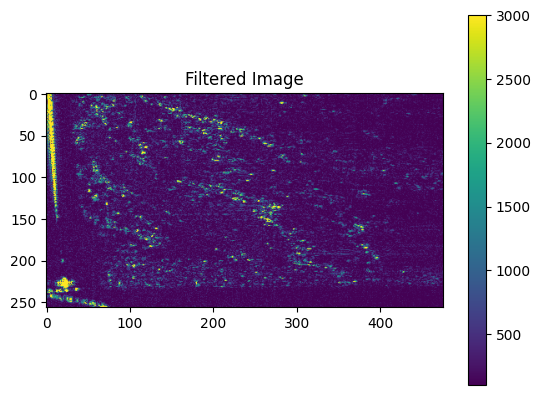

In [27]:
import h5py
import numpy as np
import h5py
import matplotlib.pyplot as plt

with h5py.File("avecdeformation.mat", "r") as f:
    img_avec = f["img"][:]  # Extract raw data

# If img_avec is a structured array, we need to index properly
if isinstance(img_avec, np.ndarray) and img_avec.dtype.names:
    img_avec = img_avec[img_avec.dtype.names[0]]  # Extract first field

img_avec = np.array(img_avec)  # Convert to a NumPy array
img_avec = np.abs(img_avec)  # Apply absolute function safely

plt.figure()
plt.imshow(img_avec, vmin=0.01 * 10**4, vmax=0.3 * 10**4)
plt.colorbar()
plt.title("epsilon")
plt.show()

# Generate meshgrid for filtering
N1, N2 = img_avec.shape
x = np.linspace(-1, 1, N2)
y = np.linspace(-1, 1, N1)
X, Y = np.meshgrid(x, y)

filtre = (1 - np.tanh((np.sqrt((X - 0.3) ** 2 + Y**2) - 10) * N2 / 10)) / 2

# Apply filter and display second image
img_filtered = np.clip(img_avec * filtre, 0.01 * 10**4, 0.3 * 10**4)
plt.figure()
plt.imshow(img_filtered)
plt.colorbar()
plt.title("Filtered Image")
plt.show()

In [ ]:
image1 = np.random.rand(100, 100) * 255  # Simulated grayscale image
image2 = np.random.rand(100, 100) * 255  # Simulated grayscale image
lucas_kanade(image1, image2)[0].shape, image1.shape

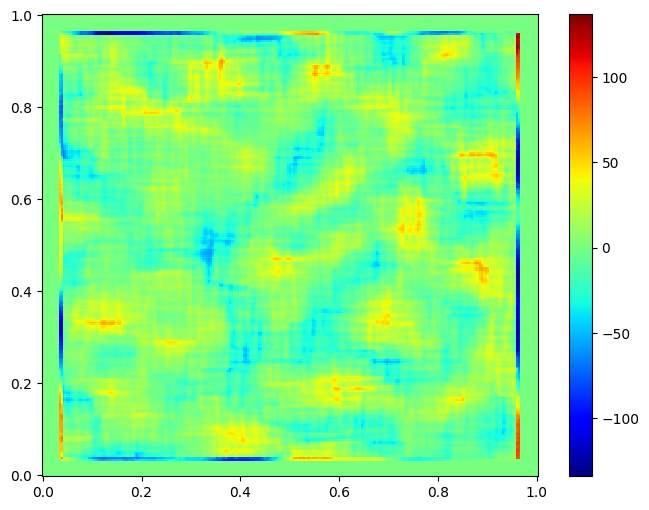

In [22]:
image1 = tiff.imread("img1.tif") / 255
image2 = tiff.imread("img2.tif") / 255


image1 = image1.astype(jnp.float64)
image2 = image2.astype(jnp.float64)

# print(image1.shape)


vx, vy = lucas_kanade(
    image1, image2, type="2P", window_size=20
)  # Ici j'ai augmenté juste la taille de la fenetre.


# Grille 2D
Nx = 256
Ny = 256

x = jnp.linspace(0, 1, Nx)
y = jnp.linspace(0, 1, Ny)
dx = x[1] - x[0]
dy = y[1] - y[0]

X, Y = jnp.meshgrid(x, y)


# === Calcul du curl ===

dvdx = jnp.gradient(vy, dx, axis=1)
dudy = jnp.gradient(vx, dy, axis=0)

curl = dvdx - dudy


dudx = jnp.gradient(vx, dx, axis=1)
dvdy = jnp.gradient(vy, dy, axis=0)
div = dudx + dvdy


plt.figure(figsize=(8, 6))

pc = plt.pcolor(X, Y, curl, cmap="jet")

plt.colorbar(pc)

plt.show()

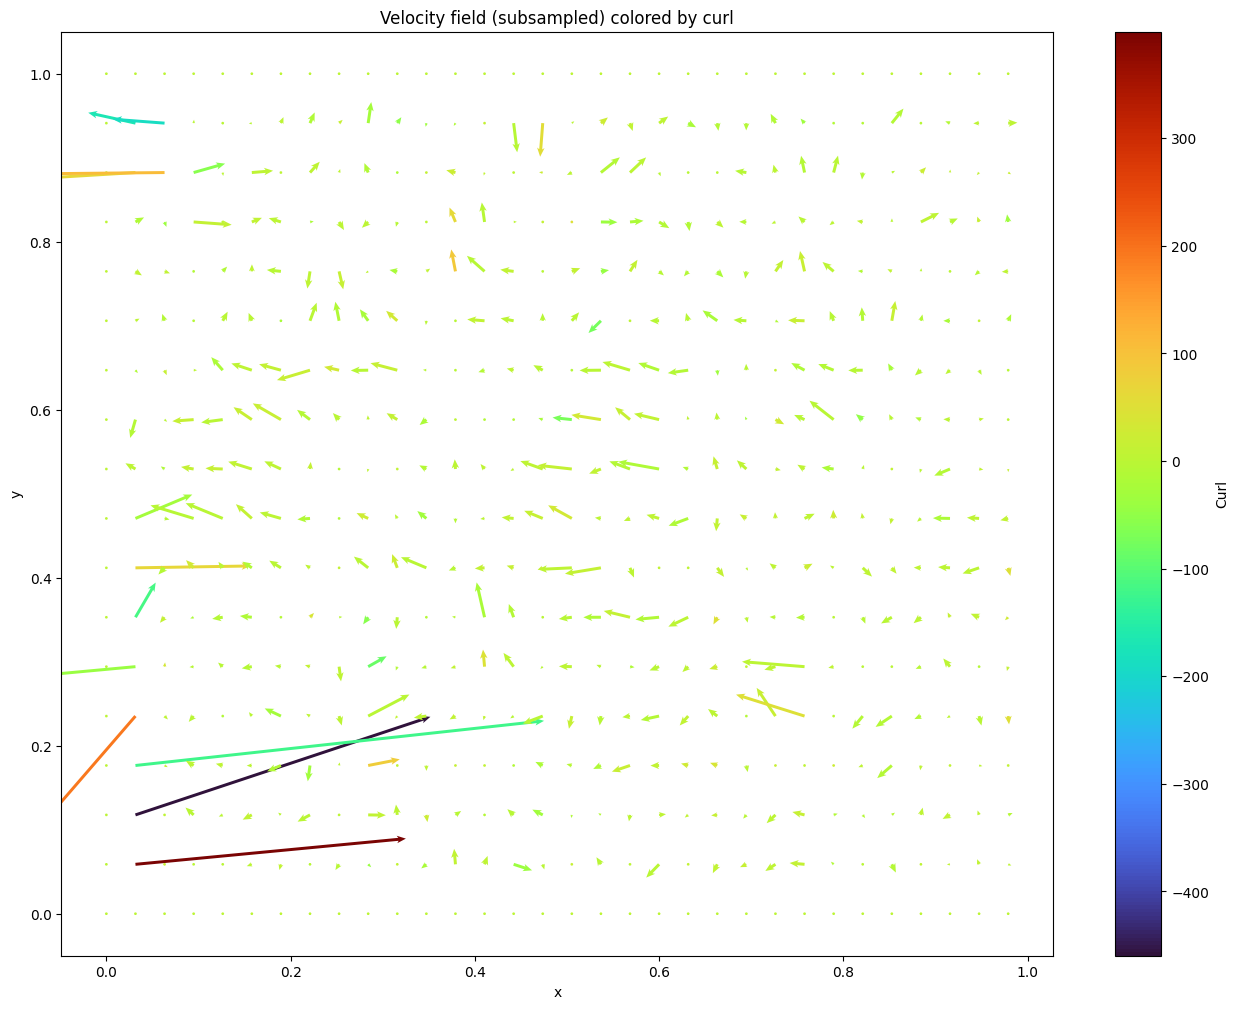

In [ ]:
# Load images
import tifffile as tiff

image1 = tiff.imread("img1.tif") / 255
image2 = tiff.imread("img2.tif") / 255

image1 = image1.astype(jnp.float64)
image2 = image2.astype(jnp.float64)


# curl:

# Direction = where the arrow points (flow direction).

# Length = how fast/strong the flow is at that point.

# Color = whether the flow locally swirls clockwise/counterclockwise, and by how much.


vx, vy = lucas_kanade(img_sans, img_avec, type="2P", window_size=20)

# Grid
Ny, Nx = vx.shape  # match flow field shape
x = jnp.linspace(0, 1, Nx)
y = jnp.linspace(0, 1, Ny)
dx = x[1] - x[0]
dy = y[1] - y[0]
X, Y = jnp.meshgrid(x, y)

# Curl (scalar field)
dvdx = jnp.gradient(vy, dx, axis=1)
dudy = jnp.gradient(vx, dy, axis=0)
curl = dvdx - dudy

# === Subsample for clarity ===
step = 15  # plot every 8th vector (adjust as needed)
X_sub = X[::step, ::step]
Y_sub = Y[::step, ::step]
vx_sub = vx[::step, ::step]
vy_sub = vy[::step, ::step]
curl_sub = curl[::step, ::step]

# === Vector field visualization ===
plt.figure(figsize=(16, 12))
plt.quiver(
    X_sub,
    Y_sub,
    vx_sub,
    vy_sub,
    curl_sub,
    cmap="turbo",
    scale=20,  # ↓ smaller → longer arrows
    width=0.003,  # shaft thickness
    headwidth=2.5,  # ↓ smaller arrowhead width
    headlength=3,  # ↓ smaller arrowhead length
    headaxislength=2.5,  # ↓ keeps arrowhead compact
)
plt.colorbar(label="Curl")
plt.title("Velocity field (subsampled) colored by curl")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [ ]:
import warnings


class OpticalFlow:
    def __init__(self, image1: jnp.ndarray, image2: jnp.ndarray):
        """
        Initialize Optical Flow estimator with two images.

        Args:
            image1: First image (H, W)
            image2: Second image (H, W)
        """
        if image1.shape != image2.shape:
            raise ValueError("Images must have the same shape")

        self.image1 = np.asarray(image1, dtype=np.float32)
        self.image2 = np.asarray(image2, dtype=np.float32)
        self.__lk_u_flow = None
        self.__lk_v_flow = None
        self.__ctf_u_flow = None
        self.__ctf_v_flow = None

    def _compute_gradients_sobel(self, image1: jnp.ndarray, image2: jnp.ndarray):
        kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)

        kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

        # Symmetric spatial gradients
        I_avg = 0.5 * (image1 + image2)
        Ix = convolve2d(I_avg, kernel_x, mode="same", boundary="symm")
        Iy = convolve2d(I_avg, kernel_y, mode="same", boundary="symm")

        It = image2 - image1
        return Ix, Iy, It

    def lucas_kanade(
        self,
        image1=None,
        image2=None,
        window_size: int = 5,
        eigen_threshold: float = 1e-3,
    ):
        if image1 is None:
            image1 = self.image1
        if image2 is None:
            image2 = self.image2

        Ix, Iy, It = self._compute_gradients_sobel(image1, image2)
        print(Ix, Iy, It)

        h, w = image1.shape
        half = window_size // 2

        flow_u = np.zeros((h, w), dtype=np.float32)
        flow_v = np.zeros((h, w), dtype=np.float32)

        for i in range(half, h - half):
            for j in range(half, w - half):
                Ix_w = Ix[i - half : i + half + 1, j - half : j + half + 1].ravel()
                Iy_w = Iy[i - half : i + half + 1, j - half : j + half + 1].ravel()
                It_w = It[i - half : i + half + 1, j - half : j + half + 1].ravel()

                A = np.stack((Ix_w, Iy_w), axis=1)
                b = -It_w

                ATA = A.T @ A
                min_eig = np.min(np.linalg.eigvals(ATA))

                if min_eig < eigen_threshold:
                    warnings.warn(
                        f"Lucas–Kanade ill-conditioned at pixel ({i}, {j}): "
                        f"min eigenvalue = {min_eig:.2e}",
                        RuntimeWarning,
                    )
                    continue

                v = np.linalg.solve(ATA, A.T @ b)
                flow_u[i, j], flow_v[i, j] = v

        self.__lk_u_flow = flow_u
        self.__lk_v_flow = flow_v
        return self.__lk_u_flow, self.__lk_v_flow

    def _downsample_image(self, image: jnp.ndarray, level: int) -> jnp.ndarray:
        """
        Downsample hierarchically: apply blur+stride level times.
        """
        kernel = jnp.ones((2, 2)) / 4  # fixed small box filter
        for _ in range(level):
            image = convolve2d(image, kernel, mode="same")
            image = image[::2, ::2]
        return image

    def _upsample_flow_cv(
        self, u_coarse, v_coarse, new_shape, method
    ) -> tuple[np.ndarray, np.ndarray]:
        """
        u_coarse, v_coarse : (Hc, Wc) numpy arrays (floats)
        new_shape: (Hf, Wf) e.g. (250, 250)
        returns u_fine, v_fine : (Hf, Wf)
        """
        Hc, Wc = u_coarse.shape
        Hf, Wf = new_shape
        sx = Wf / Wc
        sy = Hf / Hc

        u_resized = resize(u_coarse.astype(jnp.float32), (Hf, Wf), method)
        v_resized = resize(v_coarse.astype(jnp.float32), (Hf, Wf), method)

        u_resized *= sx
        v_resized *= sy

        return u_resized, v_resized

    def _warp_image(
        self,
        I2,
        u,
        v,
        interpolation,
        borderMode,
        borderValue,
    ) -> np.ndarray:
        """
        Backward warp of I2 using flow fields (u, v).
        I2: np.ndarray, shape (H, W) or (H, W, 3)
        u, v: optical flow fields, shape (H, W)
        Returns: I2_warped, same shape as I2
        """
        H, W = u.shape

        # print(I2.shape,u.shape,v.shape)
        # create base grid
        x, y = np.meshgrid(np.arange(W), np.arange(H))

        # destination coordinates in I2
        x2 = x + np.asarray(u)
        y2 = y + np.asarray(v)
        # OpenCV remap wants float32 maps
        map_x = x2.astype(np.float32)
        map_y = y2.astype(np.float32)

        I2_warped = cv2.remap(
            I2,
            map_x,
            map_y,
            interpolation=interpolation,
            borderMode=borderMode,
            borderValue=borderValue,
        )

        return I2_warped

    def CoarseToFine(
        self,
        max_level: int,
        base_window_size: int = 10,
        remap_interpolation: int = cv2.INTER_LINEAR,
        remap_borderMode: int = cv2.BORDER_CONSTANT,
        remap_borderValue: int = 0,
        resize_method: str = "bilinear",
        inner_iterations: int = 3,
    ) -> tuple[jnp.ndarray, jnp.ndarray]:
        # Coarsest level
        new_image1 = self._downsample_image(self.image1, max_level)
        new_image2 = self._downsample_image(self.image2, max_level)

        u_flow = jnp.zeros_like(new_image1)
        v_flow = jnp.zeros_like(new_image1)

        for level in range(max_level, 0, -1):
            # Scale-aware window size
            window_size = max(3, base_window_size // (2 ** (level - 1)))

            for _ in range(inner_iterations):
                warped_image2 = self._warp_image(
                    np.asarray(new_image2),
                    u_flow,
                    v_flow,
                    remap_interpolation,
                    remap_borderMode,
                    remap_borderValue,
                )

                du, dv = self.lucas_kanade(new_image1, warped_image2, window_size)

                u_flow += du
                v_flow += dv

            # Move to next finer level
            if level > 1:
                new_image1 = self._downsample_image(self.image1, level - 1)
                new_image2 = self._downsample_image(self.image2, level - 1)

                u_flow, v_flow = self._upsample_flow_cv(
                    u_flow,
                    v_flow,
                    new_image1.shape,
                    resize_method,
                )

                # Safety check
                assert u_flow.shape == new_image1.shape

        self.__ctf_u_flow = u_flow
        self.__ctf_v_flow = v_flow
        return self.__ctf_u_flow, self.__ctf_v_flow

In [7]:
def downsample_image(image: jnp.ndarray, level: int) -> jnp.ndarray:
    """
    Downsample hierarchically: apply blur+stride level times.
    """
    kernel = jnp.ones((2, 2)) / 4  # fixed small box filter
    for _ in range(level):
        image = convolve2d(image, kernel, mode="same")
        image = image[::2, ::2]
    return image

In [8]:
def upsample_flow_cv(
    u_coarse, v_coarse, new_shape, method
) -> tuple[np.ndarray, np.ndarray]:
    """
    u_coarse, v_coarse : (Hc, Wc) numpy arrays (floats)
    new_shape: (Hf, Wf) e.g. (250, 250)
    returns u_fine, v_fine : (Hf, Wf)
    """
    Hc, Wc = u_coarse.shape
    Hf, Wf = new_shape
    sx = Wf / Wc
    sy = Hf / Hc

    u_resized = resize(u_coarse.astype(jnp.float32), (Hf, Wf), method)
    v_resized = resize(v_coarse.astype(jnp.float32), (Hf, Wf), method)

    u_resized *= sx
    v_resized *= sy

    return u_resized, v_resized


In [9]:
def warp_image(
    I2,
    u,
    v,
    interpolation,
    borderMode,
    borderValue,
) -> np.ndarray:
    """
    Backward warp of I2 using flow fields (u, v).
    I2: np.ndarray, shape (H, W) or (H, W, 3)
    u, v: optical flow fields, shape (H, W)
    Returns: I2_warped, same shape as I2
    """
    H, W = u.shape

    # print(I2.shape,u.shape,v.shape)
    # create base grid
    x, y = np.meshgrid(np.arange(W), np.arange(H))

    # destination coordinates in I2
    x2 = x + np.asarray(u)
    y2 = y + np.asarray(v)
    # OpenCV remap wants float32 maps
    map_x = x2.astype(np.float32)
    map_y = y2.astype(np.float32)

    I2_warped = cv2.remap(
        I2,
        map_x,
        map_y,
        interpolation=interpolation,
        borderMode=borderMode,
        borderValue=borderValue,
    )

    return I2_warped

In [10]:
def CoarseToFine(
    img1: jnp.ndarray,
    img2: jnp.ndarray,
    max_level: int,
    base_window_size: int = 10,
    remap_interpolation: int = cv2.INTER_LINEAR,
    remap_borderMode: int = cv2.BORDER_CONSTANT,
    remap_borderValue: int = 0,
    resize_method: str = "bilinear",
    inner_iterations: int = 3,
) -> tuple[jnp.ndarray, jnp.ndarray]:
    # Coarsest level
    new_image1 = downsample_image(img1, max_level)
    new_image2 = downsample_image(img2, max_level)

    u_flow = jnp.zeros_like(new_image1)
    v_flow = jnp.zeros_like(new_image1)

    for level in range(max_level, 0, -1):
        # Scale-aware window size
        window_size = max(3, base_window_size // (2 ** (level - 1)))

        for _ in range(inner_iterations):
            warped_image2 = warp_image(
                np.asarray(new_image2),
                u_flow,
                v_flow,
                remap_interpolation,
                remap_borderMode,
                remap_borderValue,
            )

            du, dv = lucas_kanade(
                new_image1,
                warped_image2,
                window_size=window_size,
            )

            u_flow += du
            v_flow += dv

        # Move to next finer level
        if level > 1:
            new_image1 = downsample_image(img1, level - 1)
            new_image2 = downsample_image(img2, level - 1)

            u_flow, v_flow = upsample_flow_cv(
                u_flow,
                v_flow,
                new_image1.shape,
                resize_method,
            )

            # Safety check
            assert u_flow.shape == new_image1.shape

    return u_flow, v_flow

In [ ]:
import warnings
import numpy as np
import jax.numpy as jnp
import cv2
from scipy.signal import convolve2d
from jax.image import resize


class OpticalFlow:
    def __init__(self, image1: jnp.ndarray, image2: jnp.ndarray):
        # Validate shapes
        if image1.shape != image2.shape:
            raise ValueError("Images must have the same shape")

        # Convert to float32 once at initialization
        self.image1 = np.asarray(image1, dtype=np.float32)
        self.image2 = np.asarray(image2, dtype=np.float32)

    def _compute_gradients_sobel(self, image1: jnp.ndarray, image2: jnp.ndarray):
        kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
        kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

        # Symmetric spatial gradients
        I_avg = 0.5 * (image1 + image2)
        Ix = convolve2d(I_avg, kernel_x, mode="same", boundary="symm")
        Iy = convolve2d(I_avg, kernel_y, mode="same", boundary="symm")

        It = image2 - image1
        return Ix, Iy, It

    def lucas_kanade(
        self,
        image1=None,
        image2=None,
        window_size: int = 5,
        eigen_threshold: float = 1e-3,
    ):
        if image1 is None:
            image1 = self.image1
        if image2 is None:
            image2 = self.image2

        if image1.shape != image2.shape:
            raise ValueError("Images must have the same shape")

        image1 = np.asarray(image1, dtype=np.float32)
        image2 = np.asarray(image2, dtype=np.float32)

        Ix, Iy, It = self._compute_gradients_sobel(image1, image2)

        h, w = image1.shape
        half = window_size // 2

        flow_u = np.zeros((h, w), dtype=np.float32)
        flow_v = np.zeros((h, w), dtype=np.float32)

        for i in range(half, h - half):
            for j in range(half, w - half):
                Ix_w = Ix[i - half : i + half + 1, j - half : j + half + 1].ravel()
                Iy_w = Iy[i - half : i + half + 1, j - half : j + half + 1].ravel()
                It_w = It[i - half : i + half + 1, j - half : j + half + 1].ravel()

                A = np.stack((Ix_w, Iy_w), axis=1)
                b = -It_w

                ATA = A.T @ A
                min_eig = np.min(np.linalg.eigvals(ATA))

                # FIX: Re-enable eigenvalue check
                if min_eig < eigen_threshold:
                    warnings.warn(
                        f"Lucas–Kanade ill-conditioned at pixel ({i}, {j}): "
                        f"min eigenvalue = {min_eig:.2e}",
                        RuntimeWarning,
                    )
                    continue

                v = np.linalg.solve(ATA, A.T @ b)
                flow_u[i, j], flow_v[i, j] = v

        self.flow_u = flow_u
        self.flow_v = flow_v
        return flow_u, flow_v

    def _downsample_image(self, image: jnp.ndarray, level: int) -> jnp.ndarray:
        """
        Downsample hierarchically: apply blur+stride level times.
        """
        kernel = jnp.ones((2, 2)) / 4  # fixed small box filter
        for _ in range(level):
            image = convolve2d(image, kernel, mode="same")
            image = image[::2, ::2]
        return image

    def _upsample_flow_cv(
        self, u_coarse, v_coarse, new_shape, method
    ) -> tuple[np.ndarray, np.ndarray]:
        """
        u_coarse, v_coarse : (Hc, Wc) numpy arrays (floats)
        new_shape: (Hf, Wf) e.g. (250, 250)
        returns u_fine, v_fine : (Hf, Wf)
        """
        Hc, Wc = u_coarse.shape
        Hf, Wf = new_shape
        sx = Wf / Wc
        sy = Hf / Hc

        u_resized = resize(u_coarse.astype(jnp.float32), (Hf, Wf), method)
        v_resized = resize(v_coarse.astype(jnp.float32), (Hf, Wf), method)

        u_resized *= sx
        v_resized *= sy

        return u_resized, v_resized

    def _warp_image(
        self,
        I2,
        u,
        v,
        interpolation,
        borderMode,
        borderValue,
    ) -> np.ndarray:
        """
        Backward warp of I2 using flow fields (u, v).
        I2: np.ndarray, shape (H, W) or (H, W, 3)
        u, v: optical flow fields, shape (H, W)
        Returns: I2_warped, same shape as I2
        """
        H, W = u.shape

        # create base grid
        x, y = np.meshgrid(np.arange(W), np.arange(H))

        # destination coordinates in I2
        x2 = x + np.asarray(u)
        y2 = y + np.asarray(v)
        # OpenCV remap wants float32 maps
        map_x = x2.astype(np.float32)
        map_y = y2.astype(np.float32)

        I2_warped = cv2.remap(
            I2,
            map_x,
            map_y,
            interpolation=interpolation,
            borderMode=borderMode,
            borderValue=borderValue,
        )

        return I2_warped

    def CoarseToFine(
        self,
        max_level: int,
        base_window_size: int = 10,
        remap_interpolation: int = cv2.INTER_LINEAR,
        remap_borderMode: int = cv2.BORDER_CONSTANT,
        remap_borderValue: int = 0,
        resize_method: str = "bilinear",
        inner_iterations: int = 3,
    ) -> tuple[jnp.ndarray, jnp.ndarray]:
        # Coarsest level
        new_image1 = self._downsample_image(self.image1, max_level)
        new_image2 = self._downsample_image(self.image2, max_level)

        u_flow = jnp.zeros_like(new_image1)
        v_flow = jnp.zeros_like(new_image1)

        for level in range(max_level, 0, -1):
            # Scale-aware window size
            window_size = max(3, base_window_size // (2 ** (level - 1)))

            for _ in range(inner_iterations):
                warped_image2 = self._warp_image(
                    np.asarray(new_image2),
                    u_flow,
                    v_flow,
                    remap_interpolation,
                    remap_borderMode,
                    remap_borderValue,
                )

                du, dv = self.lucas_kanade(new_image1, warped_image2, window_size)

                u_flow += du
                v_flow += dv

            # Move to next finer level
            if level > 1:
                new_image1 = self._downsample_image(self.image1, level - 1)
                new_image2 = self._downsample_image(self.image2, level - 1)

                u_flow, v_flow = self._upsample_flow_cv(
                    u_flow,
                    v_flow,
                    new_image1.shape,
                    resize_method,
                )

                # Safety check
                assert u_flow.shape == new_image1.shape

        self.flow_u = u_flow
        self.flow_v = v_flow

        # FIX: Add return statement
        return u_flow, v_flow

In [3]:
img = cv2.imread("C:/Users/hamed/OneDrive/Desktop/img.png")[:, :, 2]
img2 = cv2.imread("C:/Users/hamed/OneDrive/Desktop/sh.png")[:, :, 2]

In [30]:
op = OpticalFlow(img, img2)

In [ ]:
vx, vy = op.lucas_kanade()

In [19]:
print(vx, vy)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.07936165 0.         0.        ]
 ...
 [0.         0.         0.06047983 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ... -1.9200715   0.
   0.        ]
 ...
 [ 0.          0.          0.71776134 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


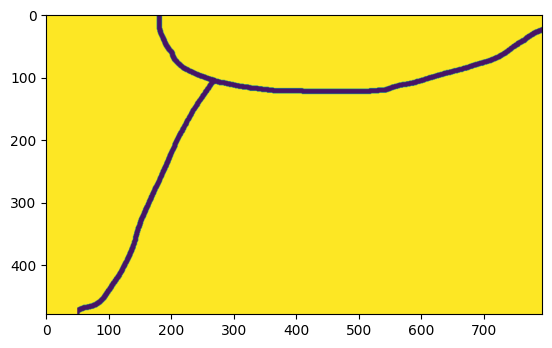

In [8]:
plt.imshow(img2)

In [11]:
vx, vy = CoarseToFine(img, img2, 3)

c:\Users\hamed\OneDrive\Desktop\PhD\Notebooks\utils_v2.py:1313: RuntimeWarning: Lucas–Kanade ill-conditioned at pixel (7, 39): min eigenvalue = 5.08e-04
  warnings.warn(
c:\Users\hamed\OneDrive\Desktop\PhD\Notebooks\utils_v2.py:1313: RuntimeWarning: Lucas–Kanade ill-conditioned at pixel (7, 53): min eigenvalue = 9.56e-06
  warnings.warn(
c:\Users\hamed\OneDrive\Desktop\PhD\Notebooks\utils_v2.py:1313: RuntimeWarning: Lucas–Kanade ill-conditioned at pixel (8, 41): min eigenvalue = 2.75e-04
  warnings.warn(
c:\Users\hamed\OneDrive\Desktop\PhD\Notebooks\utils_v2.py:1313: RuntimeWarning: Lucas–Kanade ill-conditioned at pixel (9, 40): min eigenvalue = 2.70e-07
  warnings.warn(
c:\Users\hamed\OneDrive\Desktop\PhD\Notebooks\utils_v2.py:1313: RuntimeWarning: Lucas–Kanade ill-conditioned at pixel (9, 41): min eigenvalue = 1.05e-04
  warnings.warn(
c:\Users\hamed\OneDrive\Desktop\PhD\Notebooks\utils_v2.py:1313: RuntimeWarning: Lucas–Kanade ill-conditioned at pixel (9, 55): min eigenvalue = 4.17e-

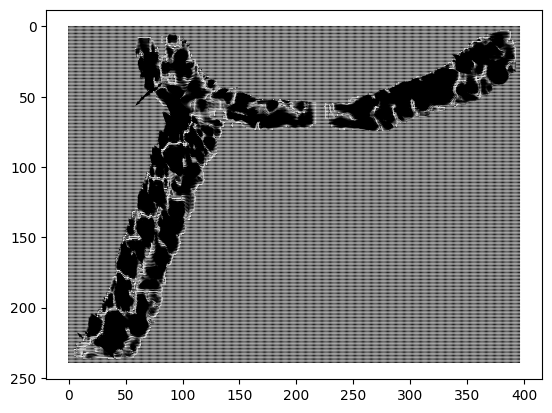

In [46]:
plt.quiver(vx, vy)
plt.gca().invert_yaxis()
plt.show()

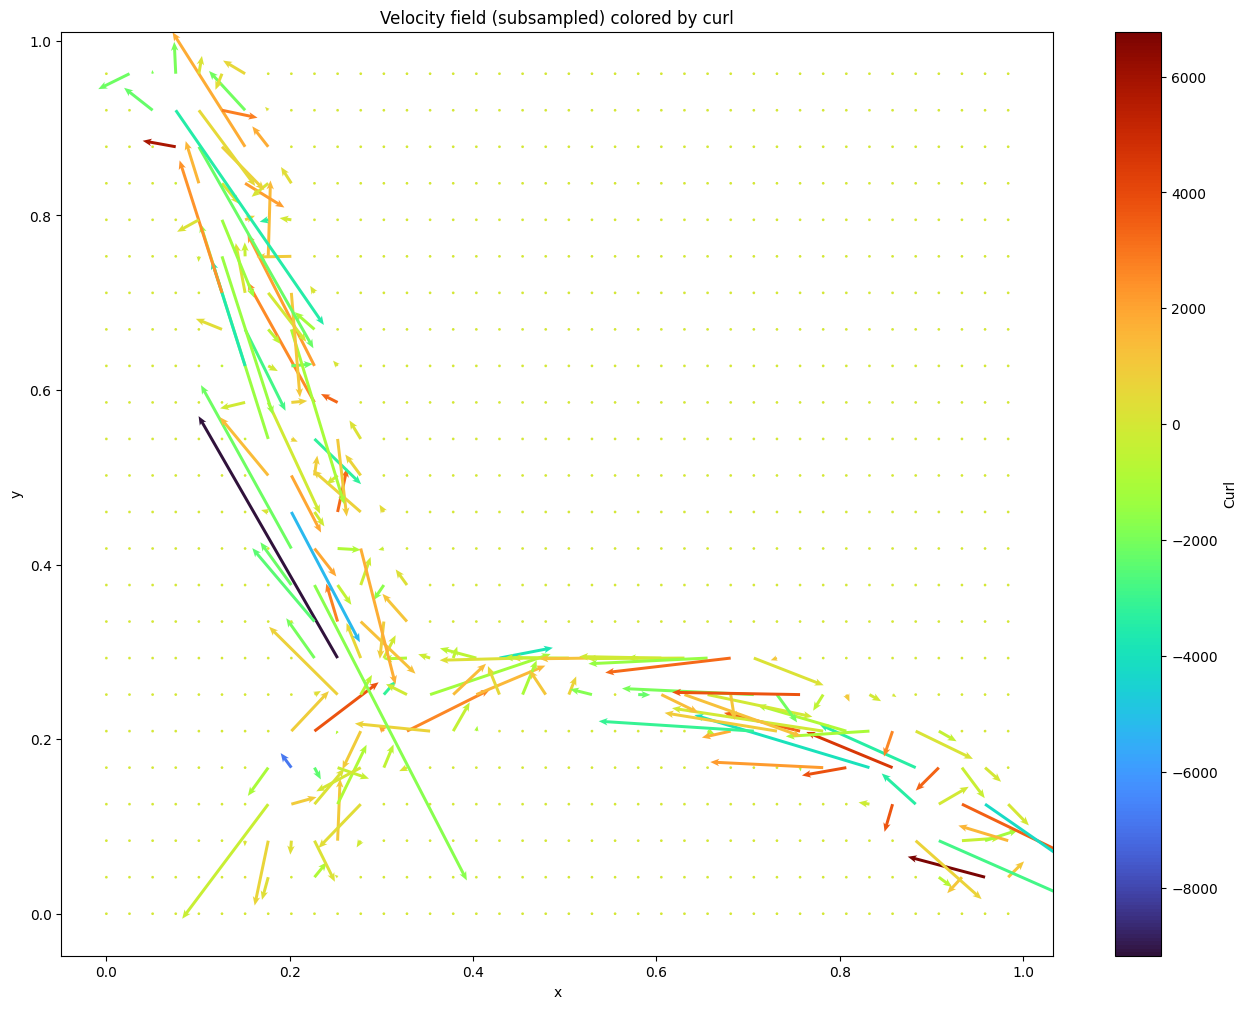

In [6]:
Ny, Nx = vx.shape  # match flow field shape
x = jnp.linspace(0, 1, Nx)
y = jnp.linspace(0, 1, Ny)
dx = x[1] - x[0]
dy = y[1] - y[0]
X, Y = jnp.meshgrid(x, y)

# Curl (scalar field)
dvdx = jnp.gradient(vx, dx, axis=1)
dudy = jnp.gradient(vy, dy, axis=0)
curl = dvdx + dudy

# === Subsample for clarity ===
step = 20  # plot every 8th vector (adjust as needed)
X_sub = X[::step, ::step]
Y_sub = Y[::step, ::step]
vx_sub = vx[::step, ::step]
vy_sub = vy[::step, ::step]
curl_sub = curl[::step, ::step]

# === Vector field visualization ===
plt.figure(figsize=(16, 12))
plt.quiver(
    X_sub,
    Y_sub,
    vx_sub,
    vy_sub,
    curl_sub,
    cmap="turbo",
    scale=300,  # ↓ smaller → longer arrows
    width=0.003,  # shaft thickness
    headwidth=2.5,  # ↓ smaller arrowhead width
    headlength=3,  # ↓ smaller arrowhead length
    headaxislength=2.5,  # ↓ keeps arrowhead compact
)
plt.colorbar(label="Curl")
plt.title("Velocity field (subsampled) colored by curl")
plt.xlabel("x")
plt.ylabel("y")
plt.show()